# **Yulu**

Yulu is an Indian technology-driven mobility platform which is trying to solve the urban traffic congestion and mobility problem.
The company was funded in 2017 with headquater in bangaluru,India.
The primary service of the yulu is a battery operated bikes which are excellent mode of commuting in urban areas and does not require licence to ride.
Yulu provides a mobile application for the consumers to start using its yulu bikes.Behind the scene yulu uses IOT, machine learning algorithms and AI to improve its service and user experience.



### **Objective of this Business case study**
Yulu has recently suffered considerable dips in its revenues.

So in this business case study we are trying to **identify the important features(factors) which affects the demands of such shared electicity vehicles** in india.

These details might help Yulu in impoving the revenue.

In [19]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, ttest_rel ,ttest_ind ,ttest_1samp ,chisquare ,chi2_contingency ,shapiro ,levene ,f_oneway ,kruskal

from statsmodels.api import qqplot

# **Load the data**

In [20]:
df = pd.read_csv('bike_sharing.csv')

In [21]:
df.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

# **Data about the Data**

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [23]:
df.shape

(10886, 12)

In [24]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

### **Dataframe Details**<br>
**Total Rows:** 10886<br>
**Total Columns:** 12<br>
### **Column Details:**<br>
**datetime**      : Categorical(Nominal)<br>
**season**        : Categorical(Nominal)<br>
**holiday**       : Categorical(Nominal)<br>
**workingday**    : Categorical(Nominal)<br>
**weather**       : Categorical(Nominal)<br>
**temp**          : Continous(Numerical)<br>
**atemp**         : Continous(Numerical)<br>
**humidity**      : Continous(Numerical)<br>
**windspeed**     : Continous(Numerical)<br>
**casual**        : Continous(Discrete)<br>
**registered**    : Continous(Discrete)<br>
**count**         : Continous(Discrete) ---> **Dependent Variable**

# **Change the datatype of colums to a appropriate datatype**<br>
**Create new colums**<br>
date<br>
month<br>
year<br>
hour<br>
**Change the Datatype**<br>
season --> Object<br>
Holiday --> Object<br>
workingday --> Object<br>
weather --> Object<br>


In [25]:
# change "datetime" column to datetime
df['datetime'] = df['datetime'].apply(pd.to_datetime, format='%Y-%m-%d %H:%M:%S')

df['date'] = df['datetime'].dt.strftime('%Y/%m/%d')
df['month'] = df['datetime'].dt.strftime('%B')
df['year'] = df['datetime'].dt.strftime('%Y')
df['hour'] = df['datetime'].dt.strftime('%H')
df['yearmonth'] = df['datetime'].dt.strftime('%Y%m')

# change "season" to object
df['season'] = df['season'].replace({1:'spring',2:'summer',3:'fall',4:'winter'})

# change "holiday" to object
df['holiday'] = df['holiday'].replace({0:'no',1:'yes'})

# change "workingday" to object
df['workingday'] = df['workingday'].replace({0:'no',1:'yes'})

# change "weather" to object
df['weather'] = df['weather'].replace({1:'Clear, Few clouds, partly cloudy, partly cloudy',
                                          2:'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
                                          3:'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
                                          4:'Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog'})



In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  object        
 2   holiday     10886 non-null  object        
 3   workingday  10886 non-null  object        
 4   weather     10886 non-null  object        
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  date        10886 non-null  object        
 13  month       10886 non-null  object        
 14  year        10886 non-null  object        
 15  hour        10886 non-null  object        
 16  yearmonth   10886 non-

# **Descriptive Statistics**

In [27]:
df.describe(include='all')

datetime  season holiday workingday  \
count                           10886   10886   10886      10886   
unique                            NaN       4       2          2   
top                               NaN  winter      no        yes   
freq                              NaN    2734   10575       7412   
mean    2011-12-27 05:56:22.399411968     NaN     NaN        NaN   
min               2011-01-01 00:00:00     NaN     NaN        NaN   
25%               2011-07-02 07:15:00     NaN     NaN        NaN   
50%               2012-01-01 20:30:00     NaN     NaN        NaN   
75%               2012-07-01 12:45:00     NaN     NaN        NaN   
max               2012-12-19 23:00:00     NaN     NaN        NaN   
std                               NaN     NaN     NaN        NaN   

                                                weather         temp  \
count                                             10886  10886.00000   
unique                                                4          NaN   
top     Clear, Few clouds, partly cloudy, partly cloudy          NaN   
freq                                               7192          NaN   
mean                                                NaN     20.23086   
min                                                 NaN      0.82000   
25%                                                 NaN     13.94000   
50%                                                 NaN     20.50000   
75%                                                 NaN     26.24000   
max                                                 NaN     41.00000   
std                                                 NaN      7.79159   

               atemp      humidity     windspeed        casual    registered  \
count   10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean       23.655084     61.886460     12.799395     36.021955    155.552177   
min         0.760000      0.000000      0.000000      0.000000      0.000000   
25%        16.665000     47.000000      7.001500      4.000000     36.000000   
50%        24.240000     62.000000     12.998000     17.000000    118.000000   
75%        31.060000     77.000000     16.997900     49.000000    222.000000   
max        45.455000    100.000000     56.996900    367.000000    886.000000   
std         8.474601     19.245033      8.164537     49.960477    151.039033   

               count        date  month   year   hour yearmonth  
count   10886.000000       10886  10886  10886  10886     10886  
unique           NaN         456     12      2     24        24  
top              NaN  2011/01/01    May   2012     12    201212  
freq             NaN          24    912   5464    456       456  
mean      191.574132         NaN    NaN    NaN    NaN       NaN  
min         1.000000         NaN    NaN    NaN    NaN       NaN  
25%        42.000000         NaN    NaN    NaN    NaN       NaN  
50%       145.000000         NaN    NaN    NaN    NaN       NaN  
75%       284.000000         NaN    NaN    NaN    NaN       NaN  
max       977.000000         NaN    NaN    NaN    NaN       NaN  
std       181.144454         NaN    NaN    NaN    NaN       NaN

# **Univariate Analysis**

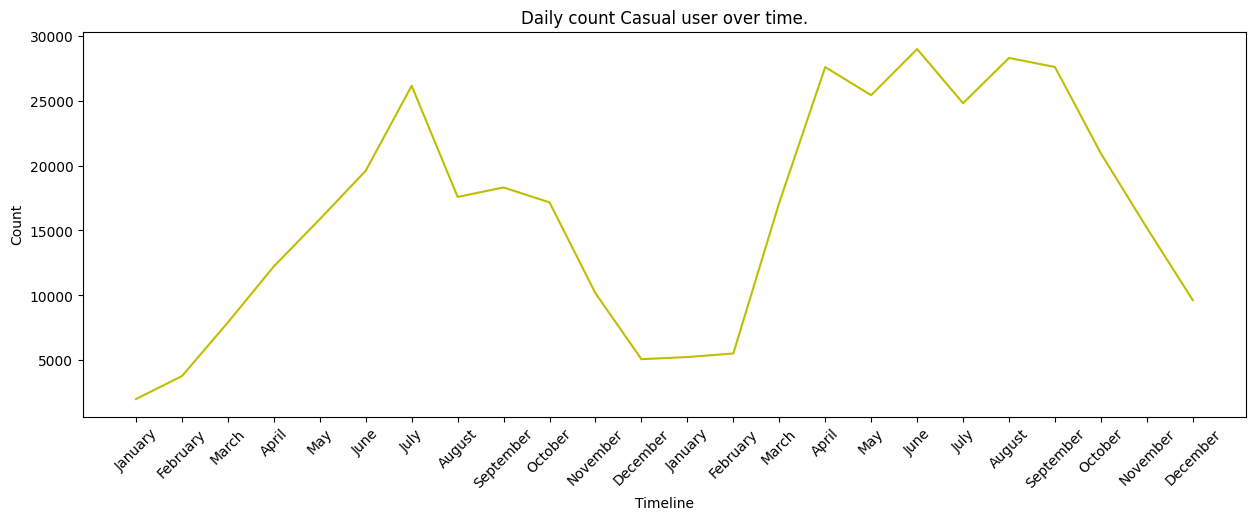

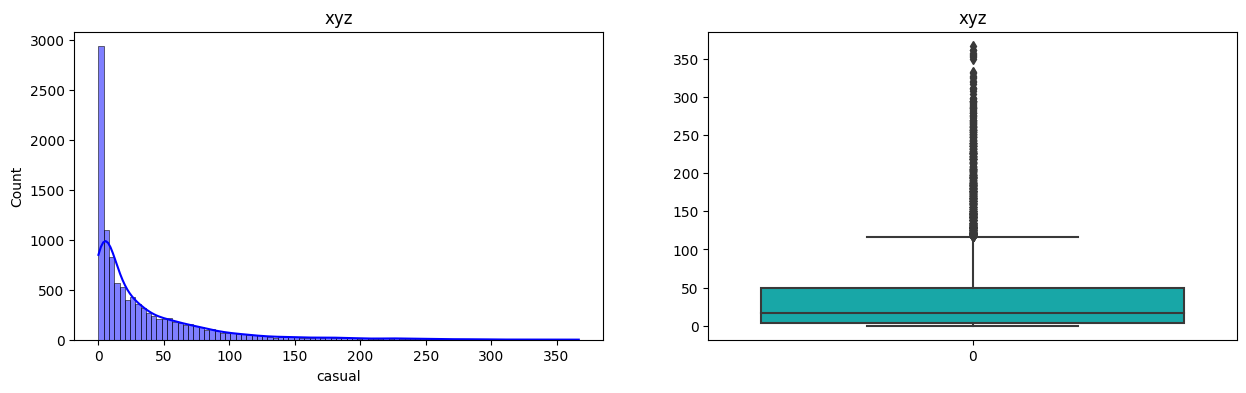

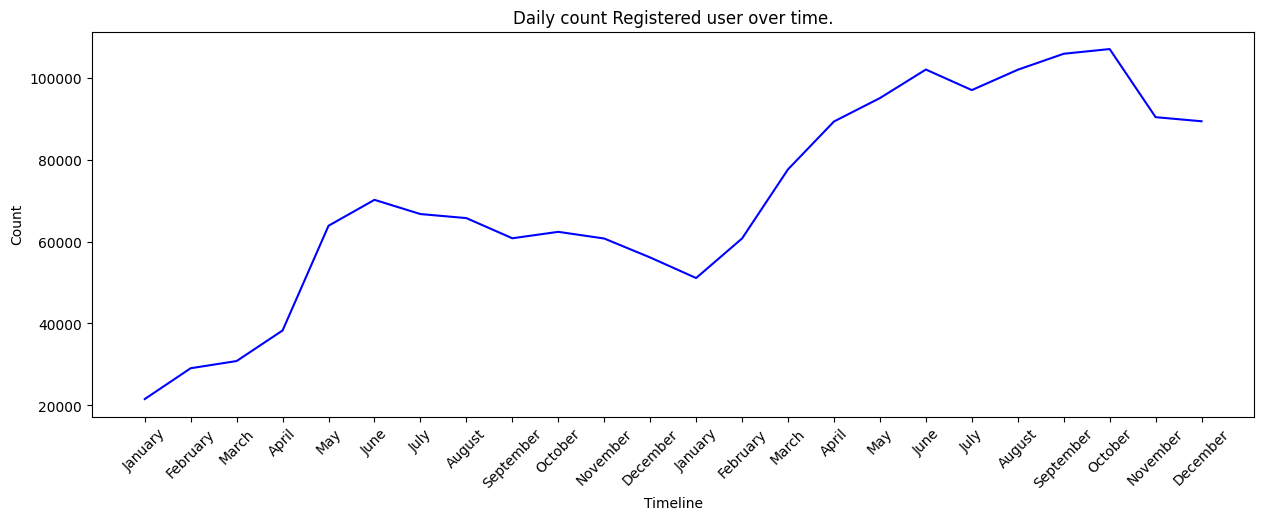

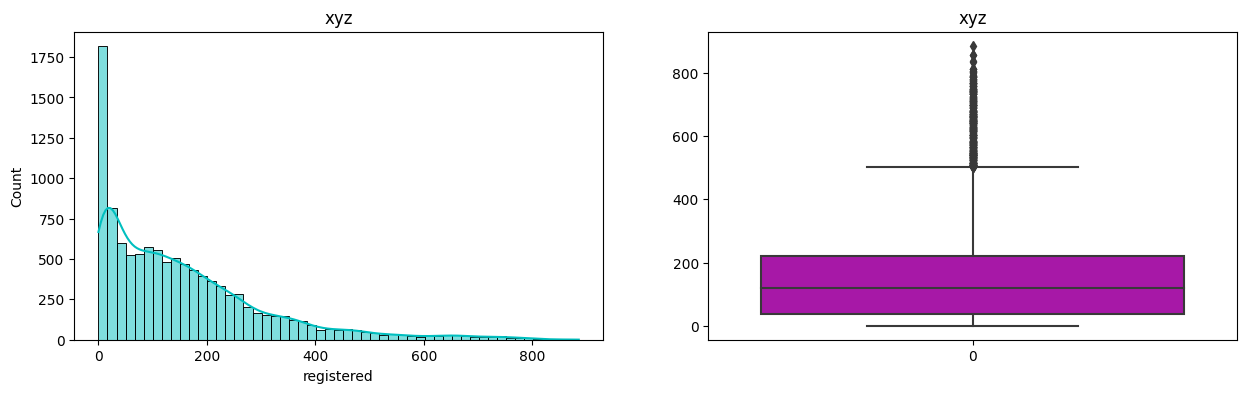

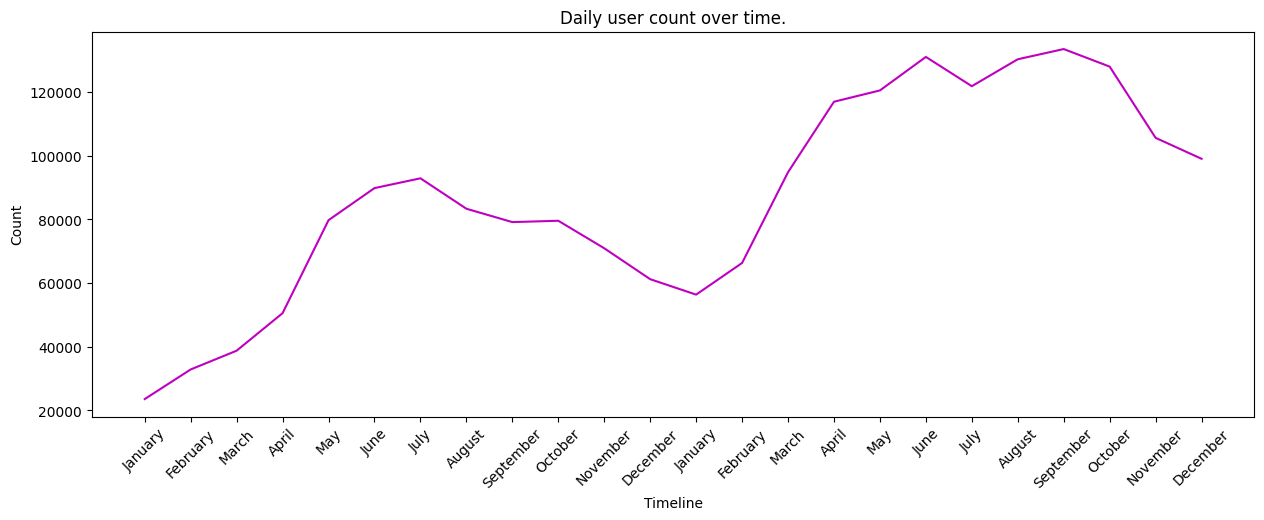

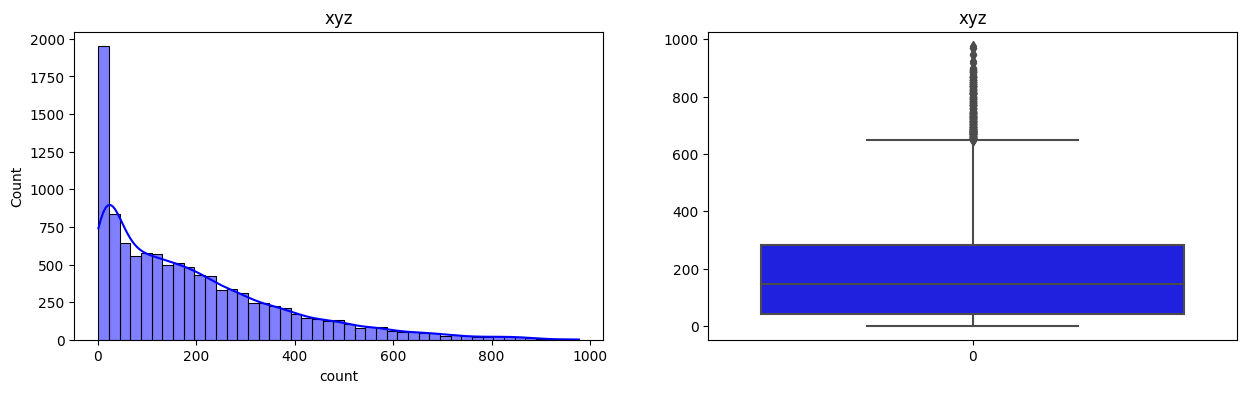

In [28]:
df_date_group = df.groupby(["yearmonth","year","month"]).aggregate({"casual": "sum", "registered" : "sum", "count":"sum"}).reset_index()
df_date_group["rownumber"] = np.arange(1,len(df_date_group)+1)

for col,title in [("casual","Daily count Casual user over time."), 
                  ("registered","Daily count Registered user over time."), 
                  ("count","Daily user count over time.")]:
    
    fig = plt.figure(figsize=(15,5))
    ax = sns.lineplot(df_date_group,x="yearmonth",y=col,color="bryckm"[np.random.randint(0,6)])
    ax.set(title = title)
    ax.set(xlabel='Timeline' , ylabel='Count')
    ax.set_xticks(ticks = df_date_group["yearmonth"] , labels = df_date_group["month"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    

    fig = plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    ax = sns.histplot(df[col],kde=True,color="bryckm"[np.random.randint(0,6)])
    ax.set(title = "xyz")

    plt.subplot(1,2,2)
    ax = sns.boxplot(df[col],color="bryckm"[np.random.randint(0,6)])
    ax.set(title = "xyz")
    


[Text(0.5, 1.0, 'Windspeed Range in the provided data timespan.')]

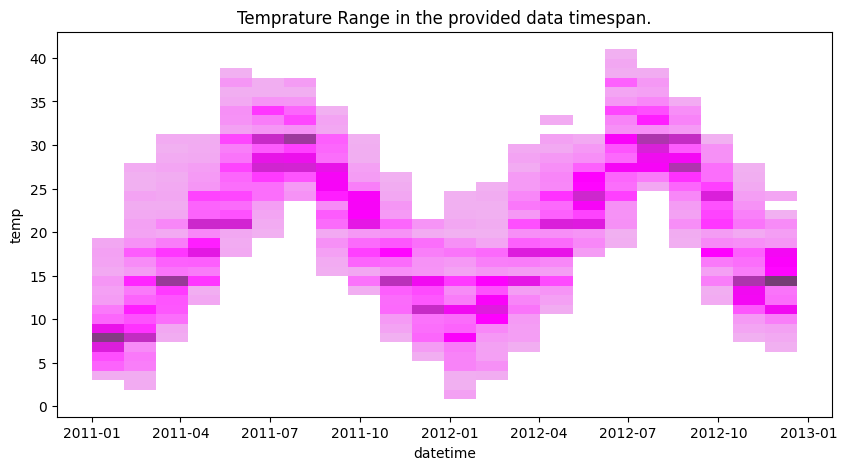

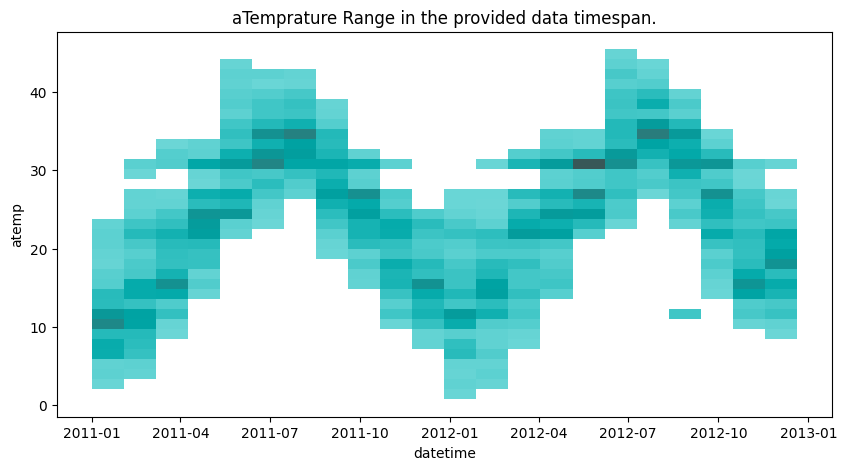

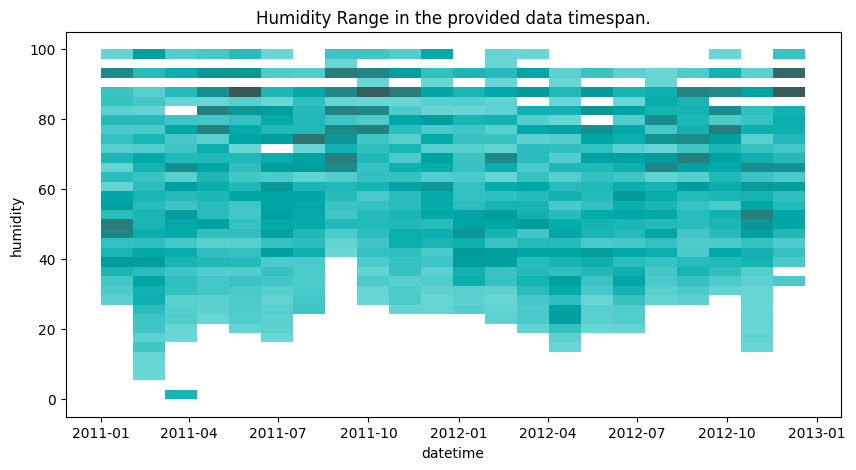

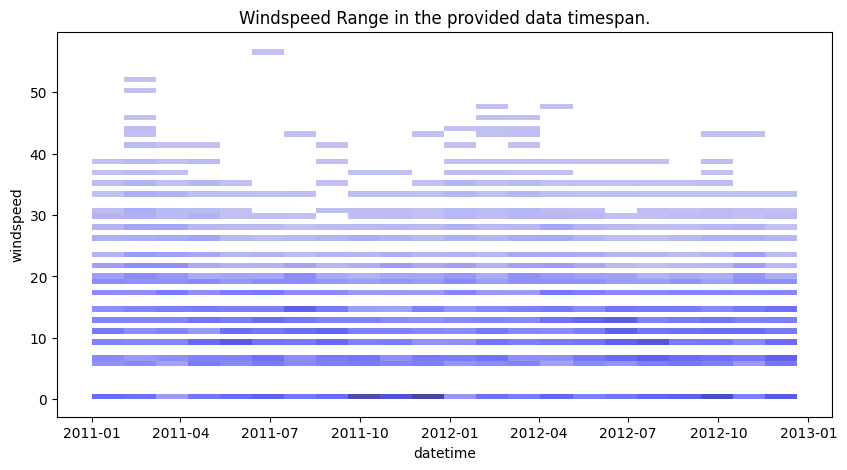

In [29]:
fig = plt.figure(figsize=(10,5))
ax = sns.histplot(df,x="datetime",y="temp",color="bryckm"[np.random.randint(0,6)])
ax.set(title = "Temprature Range in the provided data timespan.")

fig = plt.figure(figsize=(10,5))
ax = sns.histplot(df,x="datetime",y="atemp",color="bryckm"[np.random.randint(0,6)])
ax.set(title = "aTemprature Range in the provided data timespan.")

fig = plt.figure(figsize=(10,5))
ax = sns.histplot(df,x="datetime",y="humidity",color="bryckm"[np.random.randint(0,6)])
ax.set(title = "Humidity Range in the provided data timespan.")

fig = plt.figure(figsize=(10,5))
ax = sns.histplot(df,x="datetime",y="windspeed",color="bryckm"[np.random.randint(0,6)])
ax.set(title = "Windspeed Range in the provided data timespan.")

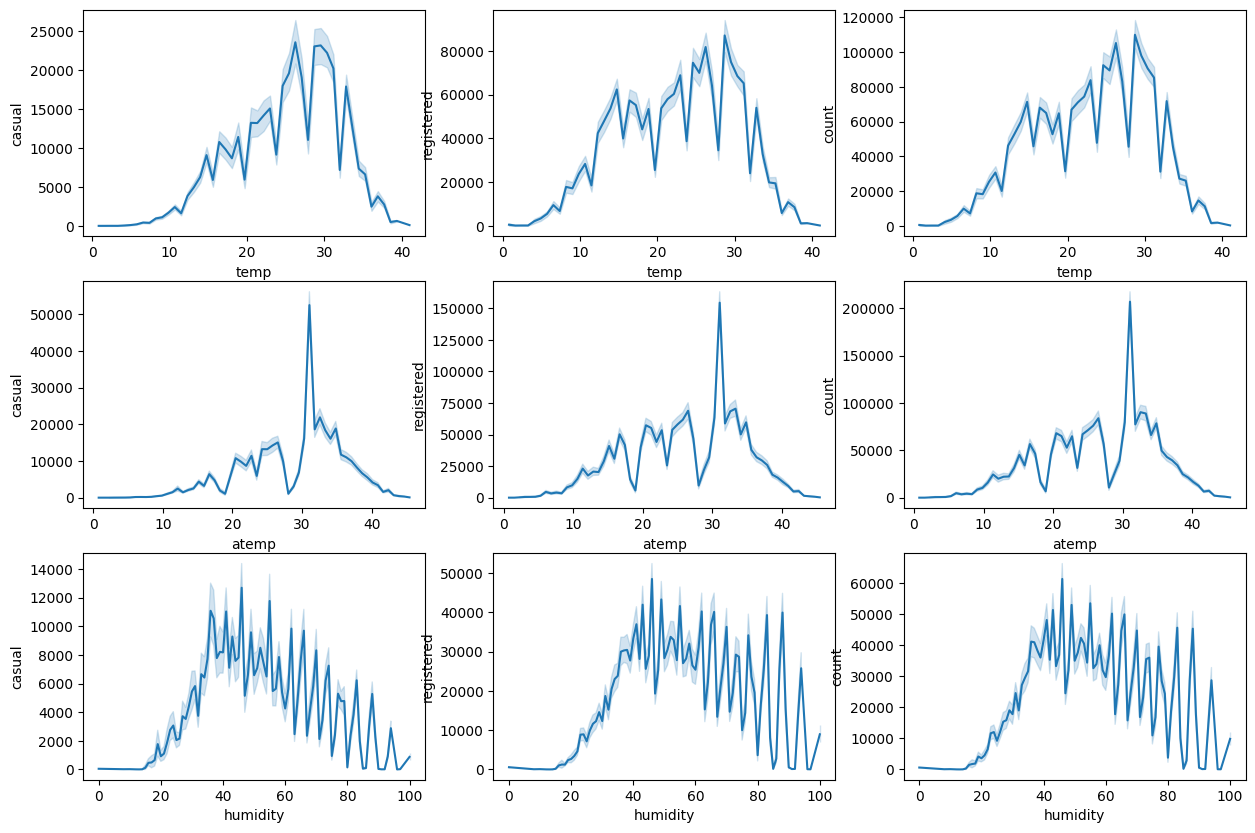

In [30]:
fig = plt.figure(figsize=(15,10))
i = 0
for col in ["temp","atemp","humidity"]:
    i = i + 1
    plt.subplot(3,3,i)
    #sns.barplot(df,x=col,y="casual",estimator=sum,errorbar= None)
    sns.lineplot(df,x=col,y="casual",estimator=sum)
    
    i = i + 1
    plt.subplot(3,3,i)
    sns.lineplot(df,x=col,y="registered",estimator=sum)

    i = i + 1
    plt.subplot(3,3,i)
    sns.lineplot(df,x=col,y="count",estimator=sum)

### **Insights**
1. There was a dip in Electric cycle renting during the period Nov-2011 - Feb-2012.<br>
2. The usage of the cycle usage not normally distributed.<br>
3. There are significant number of outliears in the daily cycle count.<br>
4. This city have hot season in June,July,August and Cold Season in November,December and Jaunuary.<br>
5. Maximum temprature goes to 40 and minimum temprature goes to 5, temprature vaies by 20.<br>
6. aTemp and temp are closely associated.<br>
7. This place have high humidity throughout the year.<br>

# **Bivariate Analysis**

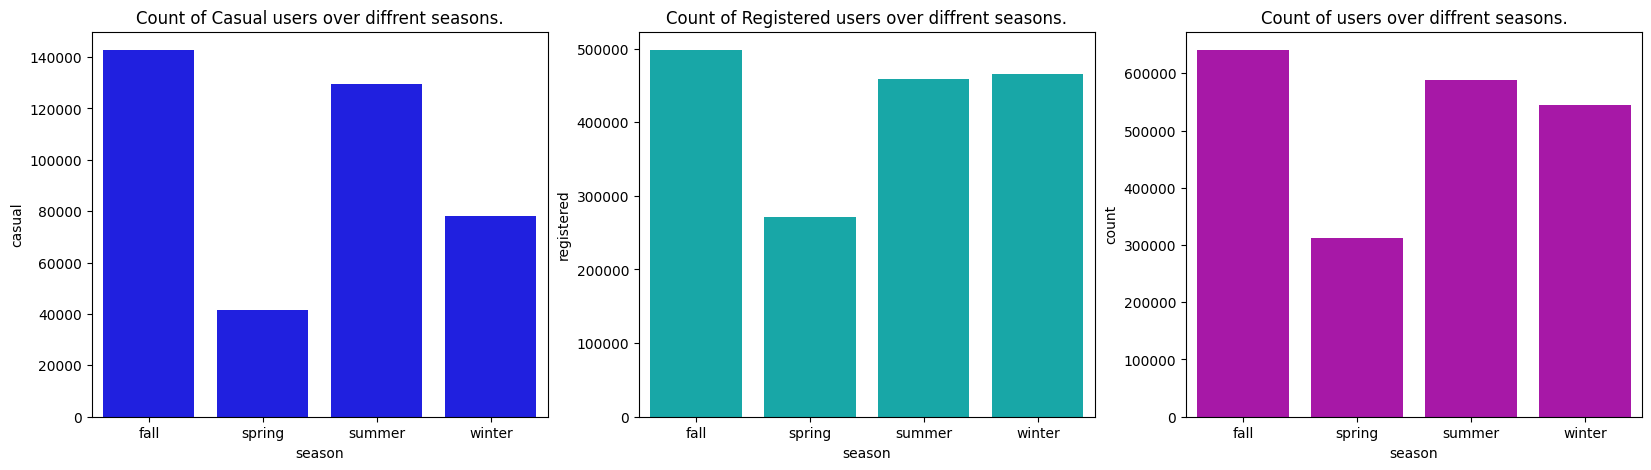

In [31]:
df_date_season = df.groupby(["season"]).aggregate({"casual": "sum", "registered" : "sum", "count":"sum"}).reset_index()
fig = plt.figure(figsize=(20,5))
i = 0
for col,title in [("casual","Count of Casual users over diffrent seasons."), 
                  ("registered","Count of Registered users over diffrent seasons."), 
                  ("count","Count of users over diffrent seasons.")]:
    i = i + 1
    plt.subplot(1,3,i)
    ax = sns.barplot(df_date_season,x="season",y=col,color="bryckm"[np.random.randint(0,6)])
    ax.set(title = title)

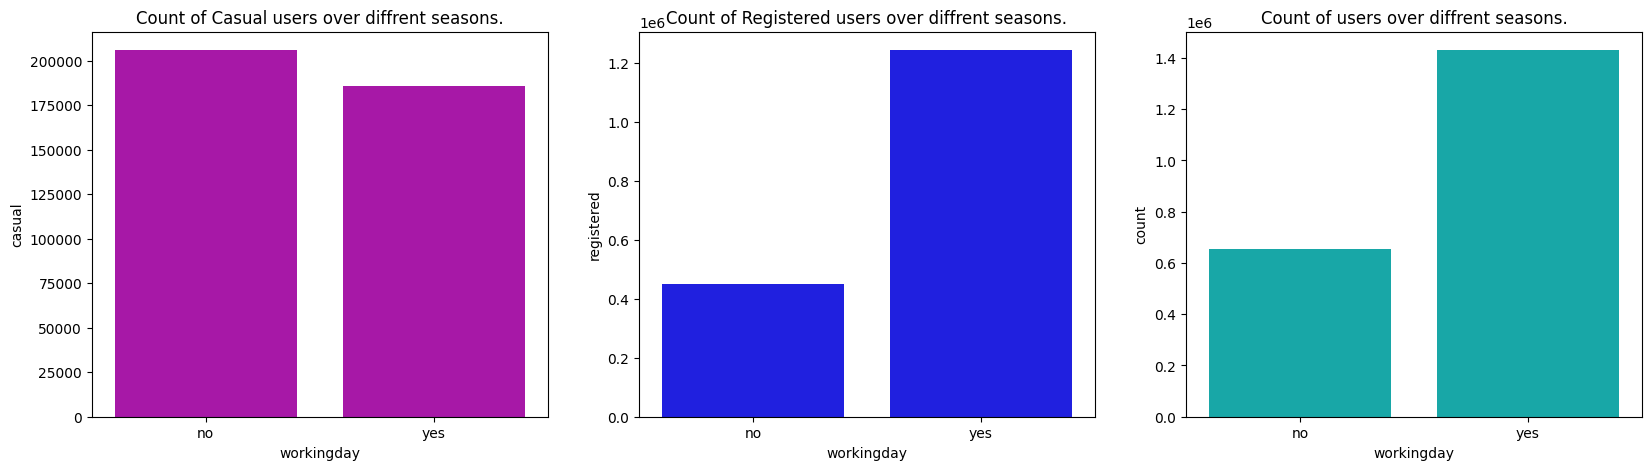

In [32]:
df_date_workingday = df.groupby(["workingday"]).aggregate({"casual": "sum", "registered" : "sum", "count":"sum"}).reset_index()
fig = plt.figure(figsize=(20,5))
i = 0
for col,title in [("casual","Count of Casual users over diffrent seasons."), 
                  ("registered","Count of Registered users over diffrent seasons."), 
                  ("count","Count of users over diffrent seasons.")]:
    i = i + 1
    plt.subplot(1,3,i)
    ax = sns.barplot(df_date_workingday,x="workingday",y=col,color="bryckm"[np.random.randint(0,6)])
    ax.set(title = title)

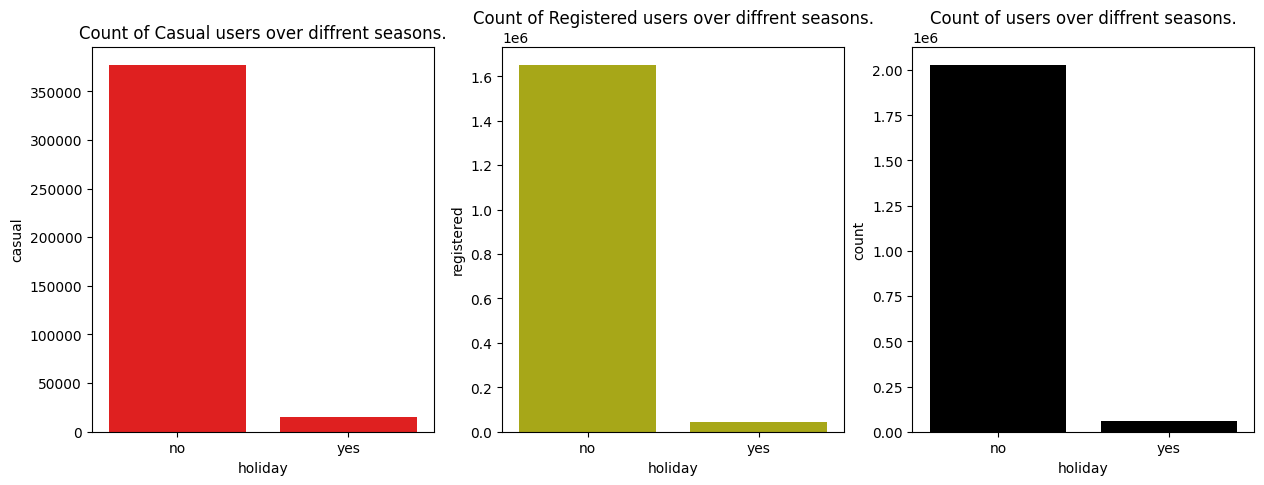

In [33]:
df_date_holiday = df.groupby(["holiday"]).aggregate({"casual": "sum", "registered" : "sum", "count":"sum"}).reset_index()
fig = plt.figure(figsize=(15,5))
i = 0
for col,title in [("casual","Count of Casual users over diffrent seasons."), 
                  ("registered","Count of Registered users over diffrent seasons."), 
                  ("count","Count of users over diffrent seasons.")]:
    i = i + 1
    plt.subplot(1,3,i)
    ax = sns.barplot(df_date_holiday,x="holiday",y=col,color="bryckm"[np.random.randint(0,6)])
    ax.set(title = title)

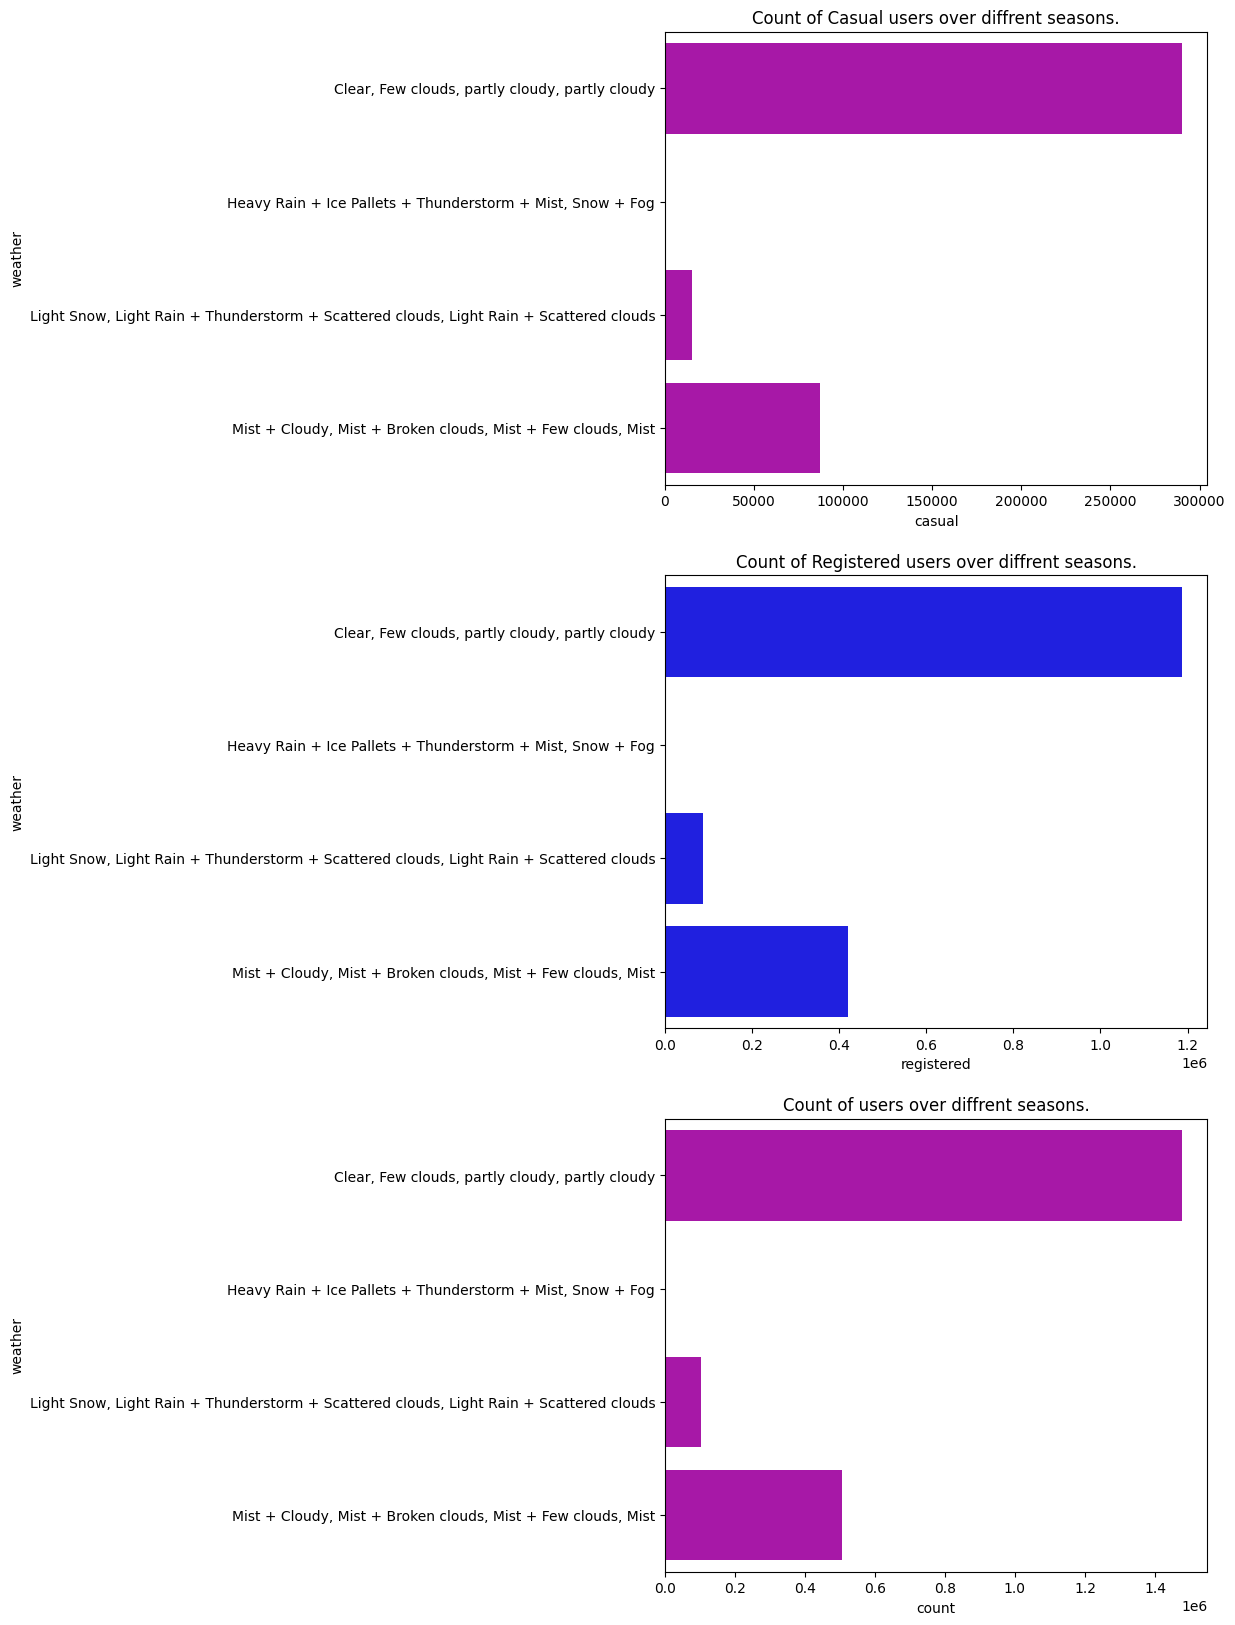

In [34]:
df_date_weather = df.groupby(["weather"]).aggregate({"casual": "sum", "registered" : "sum", "count":"sum"}).reset_index()
fig = plt.figure(figsize=(7,20))
i = 0
for col,title in [("casual","Count of Casual users over diffrent seasons."), 
                  ("registered","Count of Registered users over diffrent seasons."), 
                  ("count","Count of users over diffrent seasons.")]:
    i = i + 1
    plt.subplot(3,1,i)
    ax = sns.barplot(df_date_weather,x=col,y="weather",color="bryckm"[np.random.randint(0,6)],orient="h")
    #for tick in ax.get_yticklabels():
        #tick.set_rotation(90)
    ax.set(title = title)

<Axes: xlabel='humidity', ylabel='temp'>

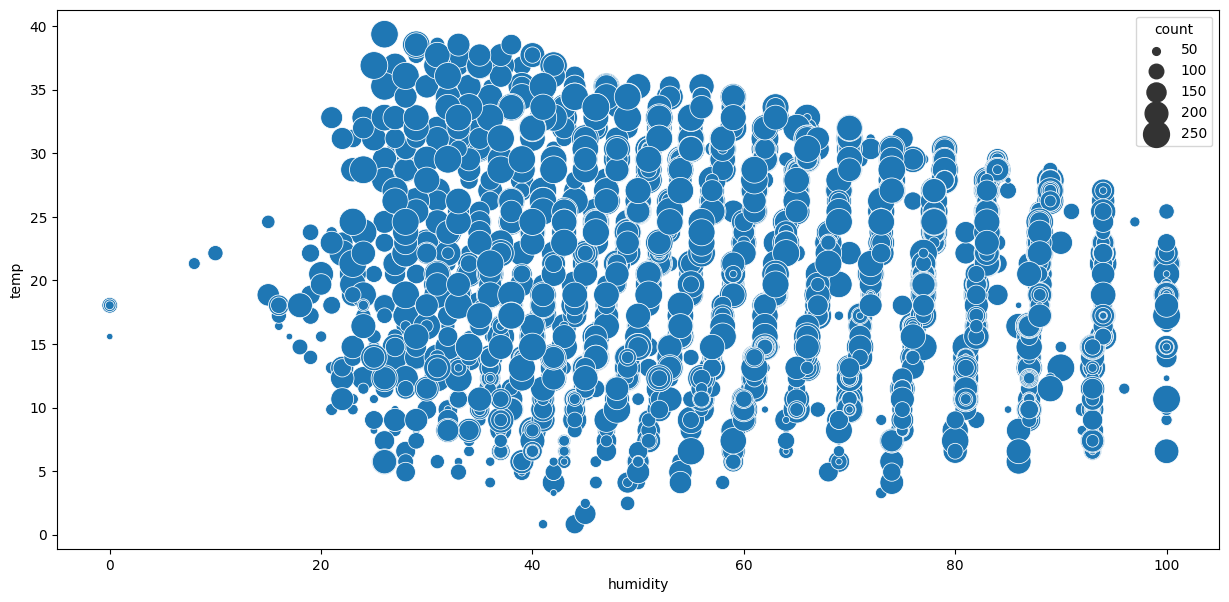

In [35]:
fig = plt.figure(figsize=(15,7))
sns.scatterplot(df[(df['count'] > 42) & (df['count'] <= 284)],x="humidity",y="temp",size="count",sizes=(20, 400))

<Axes: xlabel='humidity', ylabel='atemp'>

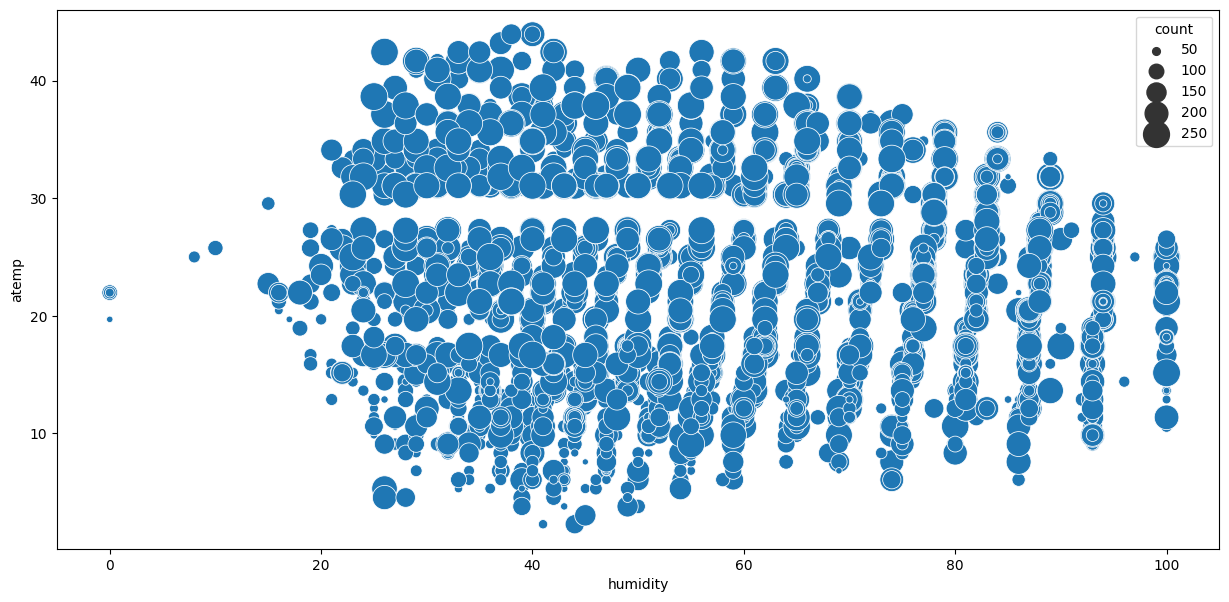

In [36]:
fig = plt.figure(figsize=(15,7))
sns.scatterplot(df[(df['count'] > 42) & (df['count'] <= 284)],x="humidity",y="atemp",size="count",sizes=(20, 400))

<Axes: >

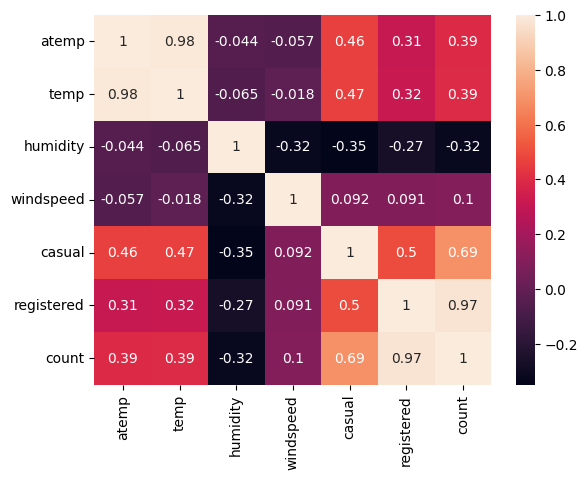

In [37]:
sns.heatmap(df[["atemp","temp","humidity","windspeed","casual","registered","count"]].corr(), annot=True)

### **Insights**
1. The least number of cycles were rented in the Spring Season.<br>
2. Usage pattern of Casual users are same for Working and Non-Working days.<br>
3. Registered users rents the cyscles more in a Working Day.<br>
4. Cycle are significantly less rented on the holiday.<br>
5. Cycles are rented in high number in Clear, Few clouds, partly cloudy, partly cloudy weather.<br>
6. There is not a significant corelation between difrrent features except temp-atemp.<br>
7. Scatter graph suggest that most of the time the temprature range beteen 15-35 and humidity 20-40.<br>

# **Hypothesis Testing**

### **1. Working Day has an effect on the number of electric cycles rented.**<br>
**Mean_WD:** Mean of the bycycle rented on Working days.<br>
**Mean_NWD:** Mean of the bycycle rented on Non-Working days.<br><br>
**Null Hypothesis(Ho)** : Mean_WD ==  Mean_NWD<br>**Alternate Hypothesis(Ha)** : Mean_WD <> Mean_NWD<br>
*alpha* = **0.05**

In [38]:
WD = df[df["workingday"] == "yes"].groupby(["date"])["count"].sum()
NWD = df[df["workingday"] == "no"].groupby(["date"])["count"].sum()

#### **Assumptions**<br>

1. Equal variances between groups.<br> 
We will check this with the **levene** test.<br><br> 
**Null Hypothesis(Ho)** : Variances are equal <br>**Alternate Hypothesis(Ha)** : Variances are not equal<br>
*alpha* = **0.05**

In [39]:
from scipy.stats import levene
alpha = 0.05
levene_stat, p_value = levene(WD, NWD)
print(p_value)

0.28003858261286085


In [40]:
if(p_value < alpha):
    print("Reject the Null Hypothesis.There is a evidance that Variances are not equal.")
else:
    print("Failed to reject the Null Hypothesis.So,the variances are equal.")

Failed to reject the Null Hypothesis.So,the variances are equal.


##### **Since, in the above step we proved that the variences are equal.So we are good to procced with the t-test.**<br>

In [41]:
import scipy.stats as stats
alpha = 0.05
p_value = stats.ttest_ind(WD,NWD,equal_var=True)[1]
print(p_value)

0.656696335987859


In [42]:
if(p_value < alpha):
    print("Reject the Null Hypothesis.There is a evidance that Means are not equal.")
else:
    print("Failed to reject the Null Hypothesis.So,the means are equal.")

Failed to reject the Null Hypothesis.So,the means are equal.


##### **The above hypothesis test retains the null hypothesis that the Working day does not have any effect on the electric cycle renting.**

### **2.  No. of cycles rented is similar or different in different seasons .**<br>
**Null Hypothesis(Ho)** : No diffrance in the means of categories<br>**Alternate Hypothesis(Ha)** : At least one category has a significant impact on mean.<br>  
*alpha* = **0.05**

##### we will use **ANOVA** or **Kruskal** test as  we have 4 categories.

#### **Assumptions**<br>
1. Each group sample is drawn from a normally distributed population.<br>
2. All populations have a common variance.

#### **Normality Test**
##### **shapiro Test**
**Null Hypothesis(Ho)** : The data is gaussian.<br>**Alternate Hypothesis(Ha)** : The data significantly deviate from a normal distribution.<br>  
*alpha* = **0.05**

In [43]:
test_data = df.groupby(["date"])["count"].sum()
winter = df[df["season"] == "winter"].groupby(["date"])["count"].sum()
summer = df[df["season"] == "summer"].groupby(["date"])["count"].sum()
fall = df[df["season"] == "fall"].groupby(["date"])["count"].sum()
spring = df[df["season"] == "spring"].groupby(["date"])["count"].sum()

from scipy.stats import shapiro
shapiro_stat, p_value = shapiro(test_data)
print("p_value = " + str(round(p_value,4)))

p_value = 0.0


In [44]:
if(p_value < alpha):
    print("Reject the Null Hypothesis.The data is not gaussian.")
else:
    print("Failed to reject the Null Hypothesis.So,the data is gaussian.")

Reject the Null Hypothesis.The data is not gaussian.


##### **QQ Test**

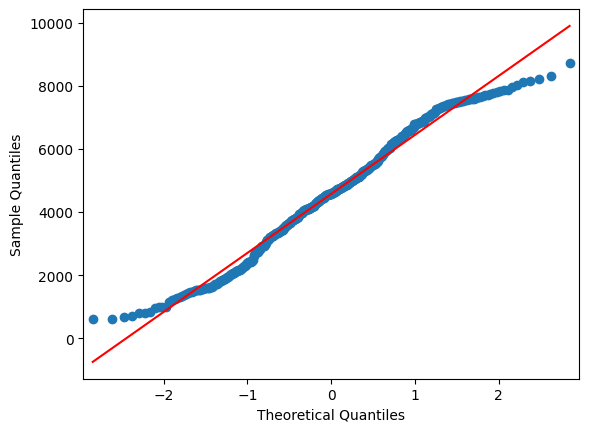

In [45]:
# QQ Plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(test_data, line='s')
plt.show()

#### **Equal Variance Test**
##### **levene Test**
**Null Hypothesis(Ho)** : The Variances are Equal.<br>**Alternate Hypothesis(Ha)** : The Variances are not equal.<br>  
*alpha* = **0.05**

In [46]:
from scipy.stats import levene
levene_stat, p_value = levene(winter, summer, fall, spring)
print("p_value = " + str(p_value))
levene_stat

p_value = 0.21194448921499898


1.50712526732494

In [47]:
if(p_value < alpha):
    print("Reject the Null Hypothesis.There is a evidance that Variances are not equal.")
else:
    print("Failed to reject the Null Hypothesis.So,the variances are equal.")

Failed to reject the Null Hypothesis.So,the variances are equal.


#### **Kruskal Test**<br>
Since the population data is not mormal we have to use Kruskal Test.<br><br>
**Null Hypothesis(Ho)** : No diffrance in the means of categories<br>**Alternate Hypothesis(Ha)** : At least one category has a significant impact on mean.<br>  
*alpha* = **0.05**


In [48]:
from scipy.stats import kruskal,f_oneway
p_value = kruskal(winter, summer, fall, spring)[1]
print("p_value = " + str(round(p_value,4)))

p_value = 0.0


In [49]:
if(p_value < alpha):
    print("Reject the Null Hypothesis.Season is having some relationship with the Count.")
else:
    print("Failed to reject the Null Hypothesis.Season and count do not have any relationship.")

Reject the Null Hypothesis.Season is having some relationship with the Count.


##### The above hypothesis test results suggest that **there is some relationship between the Season and Count of cycle rented.**

### **3.  No. of cycles rented is similar or different in different weather .**<br>
**Null Hypothesis(Ho)** : No diffrance in the means of categories<br>**Alternate Hypothesis(Ha)** : At least one category has a significant impact on mean.<br>  
*alpha* = **0.05**

##### we will use **ANOVA** or **Kruskal** test as  we have 4 categories.

#### **Assumptions**<br>
1. Each group sample is drawn from a normally distributed population.<br>
2. All populations have a common variance.

#### **Normality Test**
##### **shapiro Test**
**Null Hypothesis(Ho)** : The data is gaussian.<br>**Alternate Hypothesis(Ha)** : The data significantly deviate from a normal distribution.<br>  
*alpha* = **0.05**

In [50]:
test_data = df.groupby(["date"])["count"].sum()
clear = df[df["weather"] == "Clear, Few clouds, partly cloudy, partly cloudy"].groupby(["date"])["count"].sum()
cloudy = df[df["weather"] == "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist"].groupby(["date"])["count"].sum()
light_rain = df[df["weather"] == "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds"].groupby(["date"])["count"].sum()
heavy_rain = df[df["weather"] == "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"].groupby(["date"])["count"].sum()

from scipy.stats import shapiro
shapiro_stat, p_value = shapiro(test_data)
print("p_value = " + str(round(p_value,4)))

p_value = 0.0


In [51]:
if(p_value < alpha):
    print("Reject the Null Hypothesis.The data is not gaussian.")
else:
    print("Failed to reject the Null Hypothesis.So,the data is gaussian.")

Reject the Null Hypothesis.The data is not gaussian.


##### **QQ Test**

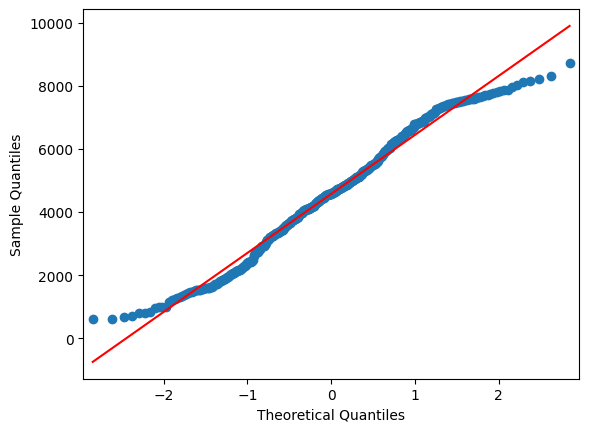

In [52]:
# QQ Plot
import statsmodels.api as sm
import matplotlib.pyplot as plt

#create Q-Q plot with 45-degree line added to plot
fig = sm.qqplot(test_data, line='s')
plt.show()

#### **Equal Variance Test**
##### **levene Test**
**Null Hypothesis(Ho)** : The Variances are Equal.<br>**Alternate Hypothesis(Ha)** : The Variances are not equal.<br>  
*alpha* = **0.05**

In [53]:
from scipy.stats import levene
levene_stat, p_value = levene(clear, cloudy, light_rain, heavy_rain)
print("p_value = " + str(p_value))

p_value = 4.1128903963643887e-53


In [54]:
if(p_value < alpha):
    print("Reject the Null Hypothesis.There is a evidance that Variances are not equal.")
else:
    print("Failed to reject the Null Hypothesis.So,the variances are equal.")

Reject the Null Hypothesis.There is a evidance that Variances are not equal.


#### **Kruskal Test**<br>
Since the population data is not mormal we have to use Kruskal Test.<br><br>
**Null Hypothesis(Ho)** : No diffrance in the means of categories<br>**Alternate Hypothesis(Ha)** : At least one category has a significant impact on mean.<br>  
*alpha* = **0.05**

In [55]:
from scipy.stats import kruskal,f_oneway
p_value = kruskal(winter, summer, fall, spring)[1]
print("p_value = " + str(round(p_value,4)))

p_value = 0.0


In [56]:
if(p_value < alpha):
    print("Reject the Null Hypothesis.Season is having some relationship with the Count.")
else:
    print("Failed to reject the Null Hypothesis.Season and count do not have any relationship.")

Reject the Null Hypothesis.Season is having some relationship with the Count.


##### The above hypothesis test results suggest that **there is some relationship between the Weather and Count of cycle rented.**

### **4.  Check if Weather is dependent on the season.**<br>
**Null Hypothesis(Ho)** : Weather and Season are independent.<br>**Alternate Hypothesis(Ha)** : Weather and Season are related ot have significant association.<br>  
*alpha* = **0.05**

##### we will use **Chi-square test of independence** test as  we have 2 Categorical variables.

In [57]:
alpha = 0.05

from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['weather'], df['season']) 
p_value = chi2_contingency(contingency_table)[1]
print("p_value = " + str(round(p_value,4)))

p_value = 0.0


In [58]:
if(p_value < alpha):
    print("Reject the Null Hypothesis.Season and Weather have association.")
else:
    print("Failed to reject the Null Hypothesis.Season and Weather are indipendent.")

Reject the Null Hypothesis.Season and Weather have association.


##### The above hypothesis test results suggest that **there is some relationship between the Weather and Season.**

# **Conclusion**<br>
1. Weather is aa important feature which have affect on the Count.
2. Season does not have affect on the count.
3. Working day does not have affect on the count.
4. Holidays have the affect on the count. 